# Assignment 6.1

In [1]:
#Import libaries
import warnings
warnings.filterwarnings("ignore")

import keras
keras.__version__

from keras import layers
from keras import models

from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path


from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools

import pandas as pd
import imageio
import csv

2023-04-24 00:07:08.187435: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
results_dir = Path('/Users/somashekarvayuvegula/Documents/Workspace/Big_Data/assignment06_Vayuvegula_SomaShekar/').joinpath('results')
results_dir.mkdir(parents=True, exist_ok=True)

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

In [5]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [7]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Review nine of the training images and labels


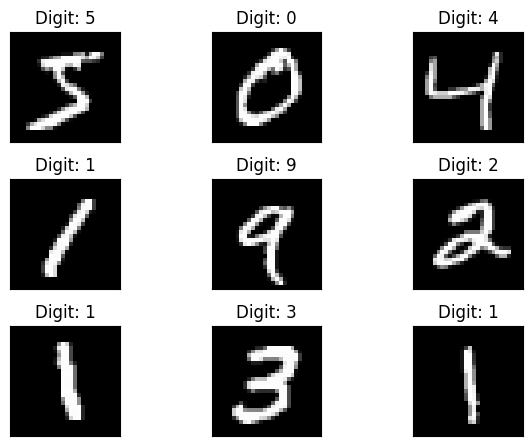

In [8]:
print("Review nine of the training images and labels")
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(train_images[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(train_labels[i]))
    plt.xticks([])
    plt.yticks([])
img_file = results_dir.joinpath('Assignment_6.1_Review_of_Nine_Digits.png')
plt.savefig(img_file)
plt.show()

Digit Review


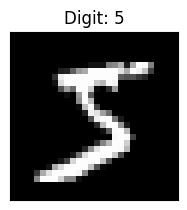

In [9]:
print("Digit Review")
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(train_images[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(train_labels[0]))
plt.xticks([])
plt.yticks([])
img_file = results_dir.joinpath('Assignment_6.1_Digit_Review.png')
plt.savefig(img_file)
plt.show()

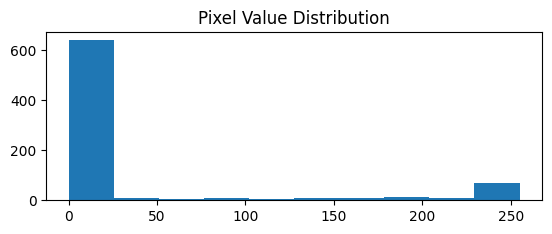

In [10]:
plt.subplot(2,1,2)
plt.hist(train_images[0].reshape(784))
plt.title("Pixel Value Distribution")
img_file = results_dir.joinpath('Assignment_6.1_Pixel_Value_Distribution.png')
plt.savefig(img_file)
plt.show()

In [11]:
# Reshape and normalize the train and test images

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [12]:
#Convert to categorical values
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
#Print categorical values
print("Train_Labels::: \n\n "+ str(train_labels) + "\n")
print("Test_Labels::: \n\n "+ str(test_labels))

Train_Labels::: 

 [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]

Test_Labels::: 

 [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Training the model and saving metrics in history
history = model.fit(train_images, train_labels,
          batch_size=64,
          epochs=5,
          verbose=2,
          validation_data=(test_images, test_labels))

Epoch 1/5
938/938 - 29s - loss: 0.1679 - accuracy: 0.9480 - val_loss: 0.0452 - val_accuracy: 0.9870 - 29s/epoch - 31ms/step
Epoch 2/5
938/938 - 29s - loss: 0.0469 - accuracy: 0.9856 - val_loss: 0.0325 - val_accuracy: 0.9894 - 29s/epoch - 31ms/step
Epoch 3/5
938/938 - 29s - loss: 0.0328 - accuracy: 0.9898 - val_loss: 0.0342 - val_accuracy: 0.9892 - 29s/epoch - 31ms/step
Epoch 4/5
938/938 - 31s - loss: 0.0253 - accuracy: 0.9926 - val_loss: 0.0251 - val_accuracy: 0.9925 - 31s/epoch - 33ms/step
Epoch 5/5
938/938 - 31s - loss: 0.0199 - accuracy: 0.9940 - val_loss: 0.0247 - val_accuracy: 0.9919 - 31s/epoch - 33ms/step


In [16]:
results = model.evaluate(test_images,test_labels)
print(results)

313/313 [==============================] - 3s 11ms/step - loss: 0.0247 - accuracy: 0.9919
[0.024694999679923058, 0.9919000267982483]


In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 12ms/step - loss: 0.0247 - accuracy: 0.9919


In [18]:
print('Test Accuracy: %s ' % test_acc)
print('Test Accuracy in percentage: %s ' % (test_acc*100))

Test Accuracy: 0.9919000267982483 
Test Accuracy in percentage: 99.19000267982483 


In [19]:
# Saving Model files to results folder
result_model_file = results_dir.joinpath('Assignment_6.1_model.h5')
model.save(result_model_file)
print('Saved trained model to results folder')

Saved trained model to results folder


## Plotting the metrics for trained model

In [20]:
history_dict = history.history

In [21]:
history_dict

{'loss': [0.16793280839920044,
  0.046930886805057526,
  0.032796334475278854,
  0.02528943493962288,
  0.019862882792949677],
 'accuracy': [0.947950005531311,
  0.9855833053588867,
  0.9898333549499512,
  0.9926166534423828,
  0.9939833283424377],
 'val_loss': [0.045235197991132736,
  0.032474368810653687,
  0.03421948105096817,
  0.025140341371297836,
  0.024695003405213356],
 'val_accuracy': [0.9869999885559082,
  0.9894000291824341,
  0.9891999959945679,
  0.9925000071525574,
  0.9919000267982483]}

In [22]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1,len(acc)+1)

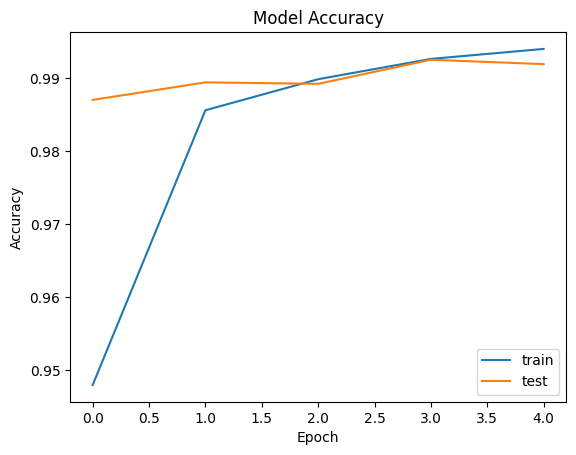

In [23]:
fig = plt.figure()
plt.plot(acc)
plt.plot(val_acc)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
img_file = results_dir.joinpath('Assignment_6.1_Model_Accuracy_Validation.png')
plt.savefig(img_file)
plt.show()

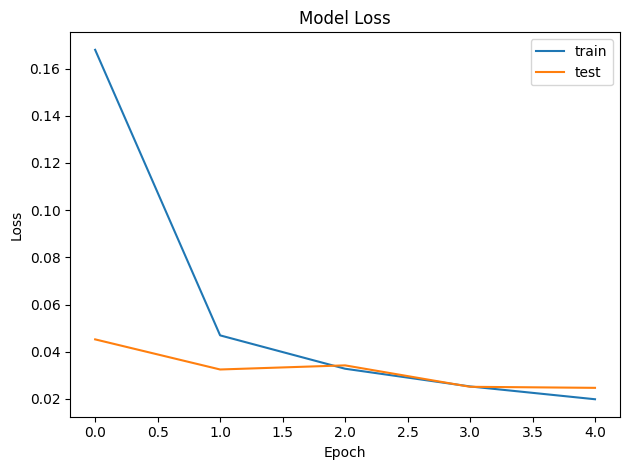

In [24]:
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
img_file = results_dir.joinpath('Assignment_6.1_Model_Loss_Validation.png')
plt.savefig(img_file)
plt.show()

In [25]:
# Load the model from file and continue

mnist_model = load_model(result_model_file)
loss_and_metrics = mnist_model.evaluate(test_images, test_labels, verbose=2)
print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 4s - loss: 0.0247 - accuracy: 0.9919 - 4s/epoch - 12ms/step
Test Loss 0.024694999679923058
Test Accuracy 0.9919000267982483


In [26]:
#Confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    img_file = results_dir.joinpath('Assignment_6.1_Confusion_Matrix.png')
    plt.savefig(img_file)
    plt.show()

188/188 [==============================] - 2s 12ms/step


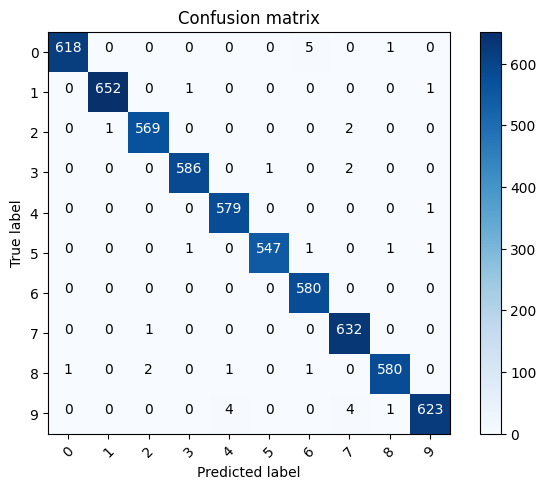

In [27]:
# convert class vectors to binary class matrices One Hot Encoding
num_classes = 10
y_train = keras.utils.to_categorical(train_labels, num_classes)
X_train, X_val, Y_train, Y_val = train_test_split(train_images, train_labels, test_size = 0.1, random_state=42)

# Predict the values from the validation dataset
Y_pred = mnist_model.predict(X_val)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val, axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [28]:
correct_indices = np.nonzero(Y_pred_classes == Y_true)[0]
incorrect_indices = np.nonzero(Y_pred_classes != Y_true)[0]

print(len(Y_pred_classes))
print(len(Y_true))
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

6000
6000
5966  classified correctly
34  classified incorrectly


In [29]:

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)
figure_evaluation = plt.figure()

<Figure size 700x1400 with 0 Axes>

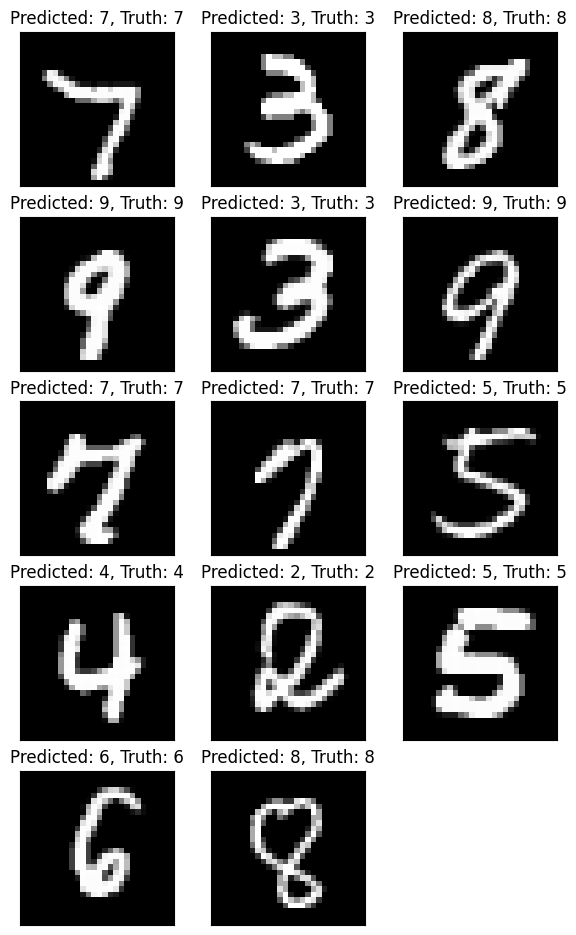

In [30]:
# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:14]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_val[correct], cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(Y_pred[correct].argmax(),
                                        Y_val[correct].argmax()))
    plt.xticks([])
    plt.yticks([])
img_file = results_dir.joinpath('Assignment_6.1_Correct_Predictions_Sample.png')
plt.savefig(img_file)
plt.show()

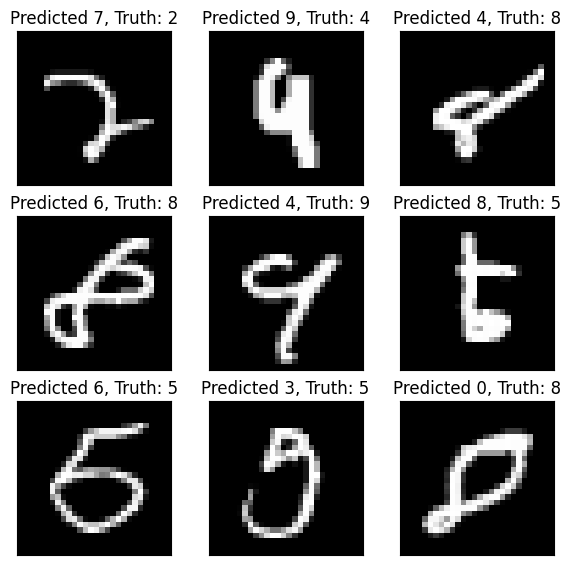

In [31]:
# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_val[incorrect], cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(Y_pred[incorrect].argmax(),
                                       Y_val[incorrect].argmax()))
    plt.xticks([])
    plt.yticks([])

img_file = results_dir.joinpath('Assignment_6.1_Incorrect_Predictions.png')
plt.savefig(img_file)
plt.show()

Prediction using an images via url


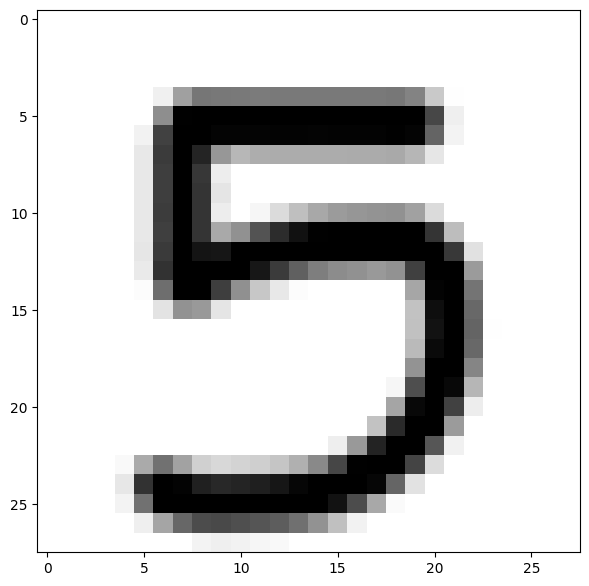

1/1 [==============================] - 0s 20ms/step
5


In [32]:
# Prediction
print("Prediction using an images via url")
im = imageio.imread("https://i.imgur.com/a3Rql9C.png")
gray = np.dot(im[...,:3], [0.299, 0.587, 0.114])
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()
# reshape the image
img_rows, img_cols = 28, 28
gray = gray.reshape(1, img_rows, img_cols, 1)
# normalize image
gray /= 255

# predict digit
predictionimg = mnist_model.predict(gray)
print(predictionimg.argmax())

Prediction using one of the mnist images


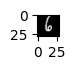

In [33]:
print("Prediction using one of the mnist images")
w = 0.28
h = 0.28
fig = plt.figure(frameon=False)
fig.set_size_inches(w,h)
img_file = results_dir.joinpath('Assignment_6.1_imagetopredict.png')
reviewdigit3 = X_val[80]

fig.canvas.draw()

plt.imshow(reviewdigit3, cmap = plt.get_cmap('gray'))
plt.savefig(img_file)
plt.show()


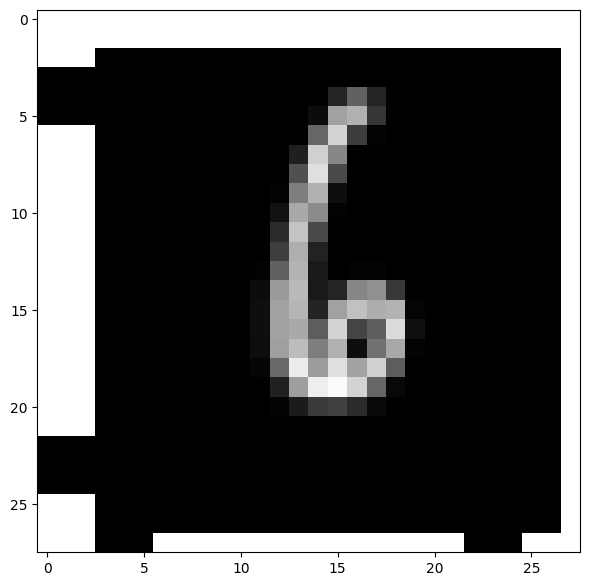

In [34]:
im = imageio.imread(img_file)
gray = np.dot(im[...,:3], [0.299, 0.587, 0.114])
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

In [35]:
# reshape the image
img_rows, img_cols = 28, 28
gray.resize((1,28,28))
gray = gray.reshape(1, img_rows, img_cols, 1)
# normalize image
gray /= 255

# predict digit
predictionimg = mnist_model.predict(gray)
print(predictionimg.argmax())

print(type(Y_pred))
print(len(Y_pred))


1/1 [==============================] - 0s 25ms/step
6
<class 'numpy.ndarray'>
6000


In [36]:
print("Gathering Predictions")

prediction_values = []
indices = np.nonzero(Y_pred)[0]
for i, v in enumerate(indices[:]):
    prediction_values.append(Y_pred[v].argmax())

d = {}
for index, value in enumerate(prediction_values):
    d[index] = value

csv_file_out = results_dir.joinpath('Assignment_6.1_Predicted_Values.csv')
with open(csv_file_out, 'w') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in d.items():
        print(str(key) + ":"+ str(value))
        writer.writerow([key, value])

Gathering Predictions
0:7
1:7
2:7
3:7
4:7
5:7
6:7
7:7
8:7
9:7
10:3
11:3
12:3
13:3
14:3
15:3
16:3
17:3
18:3
19:3
20:8
21:8
22:8
23:8
24:8
25:8
26:8
27:8
28:8
29:8
30:9
31:9
32:9
33:9
34:9
35:9
36:9
37:9
38:9
39:9
40:3
41:3
42:3
43:3
44:3
45:3
46:3
47:3
48:3
49:3
50:9
51:9
52:9
53:9
54:9
55:9
56:9
57:9
58:9
59:9
60:7
61:7
62:7
63:7
64:7
65:7
66:7
67:7
68:7
69:7
70:7
71:7
72:7
73:7
74:7
75:7
76:7
77:7
78:7
79:7
80:5
81:5
82:5
83:5
84:5
85:5
86:5
87:5
88:5
89:5
90:4
91:4
92:4
93:4
94:4
95:4
96:4
97:4
98:4
99:4
100:2
101:2
102:2
103:2
104:2
105:2
106:2
107:2
108:2
109:2
110:5
111:5
112:5
113:5
114:5
115:5
116:5
117:5
118:5
119:5
120:6
121:6
122:6
123:6
124:6
125:6
126:6
127:6
128:6
129:6
130:8
131:8
132:8
133:8
134:8
135:8
136:8
137:8
138:8
139:8
140:1
141:1
142:1
143:1
144:1
145:1
146:1
147:1
148:1
149:1
150:7
151:7
152:7
153:7
154:7
155:7
156:7
157:7
158:7
159:7
160:4
161:4
162:4
163:4
164:4
165:4
166:4
167:4
168:4
169:4
170:8
171:8
172:8
173:8
174:8
175:8
176:8
177:8
178:8
179:8
180:0
18

23987:0
23988:0
23989:0
23990:2
23991:2
23992:2
23993:2
23994:2
23995:2
23996:2
23997:2
23998:2
23999:2
24000:6
24001:6
24002:6
24003:6
24004:6
24005:6
24006:6
24007:6
24008:6
24009:6
24010:7
24011:7
24012:7
24013:7
24014:7
24015:7
24016:7
24017:7
24018:7
24019:7
24020:5
24021:5
24022:5
24023:5
24024:5
24025:5
24026:5
24027:5
24028:5
24029:5
24030:5
24031:5
24032:5
24033:5
24034:5
24035:5
24036:5
24037:5
24038:5
24039:5
24040:9
24041:9
24042:9
24043:9
24044:9
24045:9
24046:9
24047:9
24048:9
24049:9
24050:3
24051:3
24052:3
24053:3
24054:3
24055:3
24056:3
24057:3
24058:3
24059:3
24060:7
24061:7
24062:7
24063:7
24064:7
24065:7
24066:7
24067:7
24068:7
24069:7
24070:6
24071:6
24072:6
24073:6
24074:6
24075:6
24076:6
24077:6
24078:6
24079:6
24080:0
24081:0
24082:0
24083:0
24084:0
24085:0
24086:0
24087:0
24088:0
24089:0
24090:0
24091:0
24092:0
24093:0
24094:0
24095:0
24096:0
24097:0
24098:0
24099:0
24100:9
24101:9
24102:9
24103:9
24104:9
24105:9
24106:9
24107:9
24108:9
24109:9
24110:0
24111:0


47647:0
47648:0
47649:0
47650:4
47651:4
47652:4
47653:4
47654:4
47655:4
47656:4
47657:4
47658:4
47659:4
47660:9
47661:9
47662:9
47663:9
47664:9
47665:9
47666:9
47667:9
47668:9
47669:9
47670:6
47671:6
47672:6
47673:6
47674:6
47675:6
47676:6
47677:6
47678:6
47679:6
47680:8
47681:8
47682:8
47683:8
47684:8
47685:8
47686:8
47687:8
47688:8
47689:8
47690:3
47691:3
47692:3
47693:3
47694:3
47695:3
47696:3
47697:3
47698:3
47699:3
47700:4
47701:4
47702:4
47703:4
47704:4
47705:4
47706:4
47707:4
47708:4
47709:4
47710:7
47711:7
47712:7
47713:7
47714:7
47715:7
47716:7
47717:7
47718:7
47719:7
47720:4
47721:4
47722:4
47723:4
47724:4
47725:4
47726:4
47727:4
47728:4
47729:4
47730:0
47731:0
47732:0
47733:0
47734:0
47735:0
47736:0
47737:0
47738:0
47739:0
47740:7
47741:7
47742:7
47743:7
47744:7
47745:7
47746:7
47747:7
47748:7
47749:7
47750:8
47751:8
47752:8
47753:8
47754:8
47755:8
47756:8
47757:8
47758:8
47759:8
47760:0
47761:0
47762:0
47763:0
47764:0
47765:0
47766:0
47767:0
47768:0
47769:0
47770:7
47771:7


49467:4
49468:4
49469:4
49470:8
49471:8
49472:8
49473:8
49474:8
49475:8
49476:8
49477:8
49478:8
49479:8
49480:0
49481:0
49482:0
49483:0
49484:0
49485:0
49486:0
49487:0
49488:0
49489:0
49490:8
49491:8
49492:8
49493:8
49494:8
49495:8
49496:8
49497:8
49498:8
49499:8
49500:7
49501:7
49502:7
49503:7
49504:7
49505:7
49506:7
49507:7
49508:7
49509:7
49510:2
49511:2
49512:2
49513:2
49514:2
49515:2
49516:2
49517:2
49518:2
49519:2
49520:8
49521:8
49522:8
49523:8
49524:8
49525:8
49526:8
49527:8
49528:8
49529:8
49530:2
49531:2
49532:2
49533:2
49534:2
49535:2
49536:2
49537:2
49538:2
49539:2
49540:9
49541:9
49542:9
49543:9
49544:9
49545:9
49546:9
49547:9
49548:9
49549:9
49550:7
49551:7
49552:7
49553:7
49554:7
49555:7
49556:7
49557:7
49558:7
49559:7
49560:4
49561:4
49562:4
49563:4
49564:4
49565:4
49566:4
49567:4
49568:4
49569:4
49570:1
49571:1
49572:1
49573:1
49574:1
49575:1
49576:1
49577:1
49578:1
49579:1
49580:5
49581:5
49582:5
49583:5
49584:5
49585:5
49586:5
49587:5
49588:5
49589:5
49590:4
49591:4


52197:6
52198:6
52199:6
52200:0
52201:0
52202:0
52203:0
52204:0
52205:0
52206:0
52207:0
52208:0
52209:0
52210:2
52211:2
52212:2
52213:2
52214:2
52215:2
52216:2
52217:2
52218:2
52219:2
52220:2
52221:2
52222:2
52223:2
52224:2
52225:2
52226:2
52227:2
52228:2
52229:2
52230:8
52231:8
52232:8
52233:8
52234:8
52235:8
52236:8
52237:8
52238:8
52239:8
52240:6
52241:6
52242:6
52243:6
52244:6
52245:6
52246:6
52247:6
52248:6
52249:6
52250:8
52251:8
52252:8
52253:8
52254:8
52255:8
52256:8
52257:8
52258:8
52259:8
52260:7
52261:7
52262:7
52263:7
52264:7
52265:7
52266:7
52267:7
52268:7
52269:7
52270:0
52271:0
52272:0
52273:0
52274:0
52275:0
52276:0
52277:0
52278:0
52279:0
52280:4
52281:4
52282:4
52283:4
52284:4
52285:4
52286:4
52287:4
52288:4
52289:4
52290:0
52291:0
52292:0
52293:0
52294:0
52295:0
52296:0
52297:0
52298:0
52299:0
52300:6
52301:6
52302:6
52303:6
52304:6
52305:6
52306:6
52307:6
52308:6
52309:6
52310:9
52311:9
52312:9
52313:9
52314:9
52315:9
52316:9
52317:9
52318:9
52319:9
52320:8
52321:8
